## The Sparks Foundation-GRIP-Data Science and Business Analytics-August'2021
### Task 6: Prediction using Decision Tree Algorithm
### Author: Saifur Rahman Shatil

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

#### Loading the Dataset

In [2]:
iris=load_iris()
x=pd.DataFrame(data=iris.data, columns= iris.feature_names)
print(x.head())
y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Exploring the data

In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


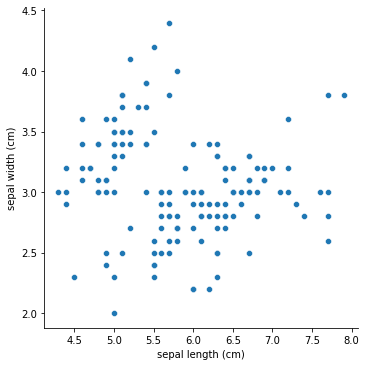

In [6]:
# relationship between sepal length and sepal width
sns.relplot(x='sepal length (cm)',y='sepal width (cm)',data=x)

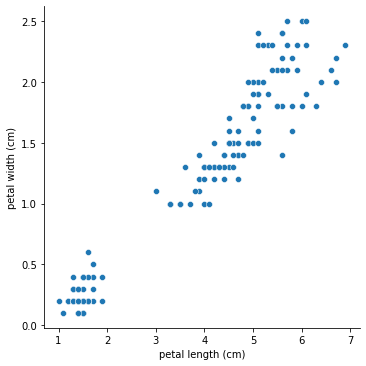

In [7]:
# Relationship between petal length and petal width
sns.relplot(x='petal length (cm)',y='petal width (cm)',data=x)

In [8]:
x.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### Spliting the data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

In [10]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


#### Model training

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred=model.predict(x_test)

In [14]:
pred= pd.DataFrame({
    'Actual': y_test,
    'Predicted':y_pred 
})
pred.to_csv('result.csv',index=False)

In [15]:
pred

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


#### Evaluating the model

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [17]:
y_train_pred= model.predict(x_train)

In [18]:
# Training Accuracy
print(accuracy_score(y_train,y_train_pred)*100)

100.0


In [19]:
# Test Accuracy
print(accuracy_score(y_test,y_pred)*100)

100.0


In [20]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### New data to make prediction

Uncomment the code below to manually input data

In [22]:
data=[]
print("enter specifications: ")
for i in range(4):
    if i==0:
        print('SepalLengthCm:')
    elif i==1:
        print('SepalWidthCm:')
    elif i==2:
        print('PetalLengthCm:')
    elif i==3:
        print('PetalWidthCm:')
    n= float(input())
    data.append(n)
data=np.reshape(data,(1,len(data)))
print(data)

enter specifications: 
SepalLengthCm:


 1.2


SepalWidthCm:


 4.3


PetalLengthCm:


 4.2


PetalWidthCm:


 6.7


[[1.2 4.3 4.2 6.7]]


In [23]:
#data=[[3,4,5,6]]
pred= model.predict(data)
if pred==0:
    print("Iris-setosa")
elif pred==1:
    print("Iris-versicolor")
elif pred==2:
    print("Iris-virginica")
else:
    pass

Iris-versicolor


#### Visualizing the tree

In [ ]:
# # Install required libraries
# !pip install pydotplus
# !apt-get install graphviz -y

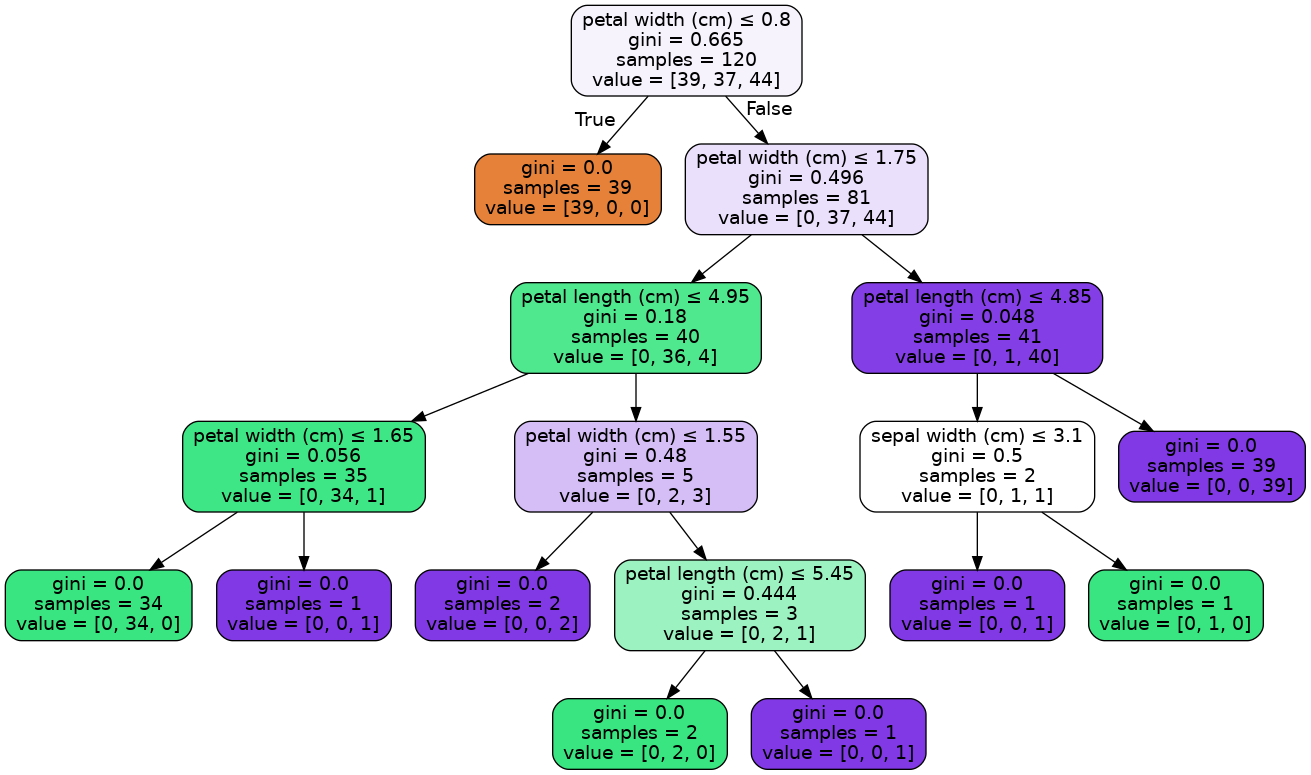

In [26]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
img=Image(graph.create_png())

In [28]:
import matplotlib.pyplot as plt
plt.savefig('img.png')

<Figure size 432x288 with 0 Axes>

#### Conclusion
Successfully implemented DTC and predicted species for an unknown value and visualized the tree